# Analyzing NanoAOD events with uproot

This is largely based on: 

* https://youtu.be/5aWAxvdrszw?t=9189 (J. Pivarski)
* https://github.com/CoffeaTeam/coffea/blob/master/binder/nanoevents.ipynb (Coffea team)




## Input files

In [1]:
import glob

input_files = glob.glob("/gridgroup/cms/jichoi/sample/mc/RunIISummer20UL18NanoAODv9/TTZToQQ_TuneCP5_13TeV-amcatnlo-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/*/*.root")

In [2]:
import pprint
pprint.pprint(input_files)
print(len(input_files))

['/gridgroup/cms/jichoi/sample/mc/RunIISummer20UL18NanoAODv9/TTZToQQ_TuneCP5_13TeV-amcatnlo-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/120000/35721593-9FBD-174C-8AB1-942D517838A7.root',
 '/gridgroup/cms/jichoi/sample/mc/RunIISummer20UL18NanoAODv9/TTZToQQ_TuneCP5_13TeV-amcatnlo-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/120000/7A781FD5-08C3-3B4D-B977-C1AC72D3B54D.root',
 '/gridgroup/cms/jichoi/sample/mc/RunIISummer20UL18NanoAODv9/TTZToQQ_TuneCP5_13TeV-amcatnlo-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/120000/8AFFA3DD-9254-0C48-9BFB-8BA1EAD419FC.root',
 '/gridgroup/cms/jichoi/sample/mc/RunIISummer20UL18NanoAODv9/TTZToQQ_TuneCP5_13TeV-amcatnlo-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/120000/AB38B066-8305-B74C-8B6A-08071DFFDFCB.root',
 '/gridgroup/cms/jichoi/sample/mc/RunIISummer20UL18NanoAODv9/TTZToQQ_TuneCP5_13TeV-amcatnlo-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/120000/B350455E-FD45-F845-BB0A-D24BBF5F7777.ro

## Looking into a nano AOD file 

In [3]:
import uproot

In [4]:
fname = input_files[0]
one_file = uproot.open(fname)

In [5]:
one_file.keys()

['tag;1',
 'Events;1',
 'LuminosityBlocks;1',
 'Runs;1',
 'MetaData;1',
 'ParameterSets;1']

In [6]:
events = one_file["Events"]
events.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | uint32_t                 | AsDtype('>u4')
luminosityBlock      | uint32_t                 | AsDtype('>u4')
event                | uint64_t                 | AsDtype('>u8')
HTXS_Higgs_pt        | float                    | AsDtype('>f4')
HTXS_Higgs_y         | float                    | AsDtype('>f4')
HTXS_stage1_1_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_1_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_1_fin... | int32_t                  | AsDtype('>i4')
HTXS_stage1_1_fin... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_fin... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_fin... | int32_t                  | AsDtype(

Jet_genJetIdx        | int32_t[]                | AsJagged(AsDtype('>i4'))
Jet_hadronFlavour    | int32_t[]                | AsJagged(AsDtype('>i4'))
Jet_partonFlavour    | int32_t[]                | AsJagged(AsDtype('>i4'))
LowPtElectron_gen... | int32_t[]                | AsJagged(AsDtype('>i4'))
LowPtElectron_gen... | uint8_t[]                | AsJagged(AsDtype('uint8'))
Muon_genPartIdx      | int32_t[]                | AsJagged(AsDtype('>i4'))
Muon_genPartFlav     | uint8_t[]                | AsJagged(AsDtype('uint8'))
Photon_genPartIdx    | int32_t[]                | AsJagged(AsDtype('>i4'))
Photon_genPartFlav   | uint8_t[]                | AsJagged(AsDtype('uint8'))
MET_fiducialGenPhi   | float                    | AsDtype('>f4')
MET_fiducialGenPt    | float                    | AsDtype('>f4')
Electron_cleanmask   | uint8_t[]                | AsJagged(AsDtype('uint8'))
Jet_cleanmask        | uint8_t[]                | AsJagged(AsDtype('uint8'))
Muon_cleanmask       | uint8_t[]   

In [7]:
muons = events.arrays(
    ["pt", "eta", "phi", "charge"],
    aliases={"pt": "Muon_pt", "eta": "Muon_eta", "phi": "Muon_phi", "charge": "Muon_charge"}
)
muons

<Array [{pt: [114, 6.68], ... charge: []}] type='1122000 * {"pt": var * float32,...'>

In [8]:
print(muons[0])
print(muons[1])

{pt: [114, 6.68], eta: [-0.523, 0.466], phi: [2.48, 2.78], charge: [-1, -1]}
{pt: [], eta: [], phi: [], charge: []}


## A first plot 

Select events with at least one muon:

In [9]:
import awkward as ak
cut = ak.num(muons.pt) > 0
cut

<Array [True, False, True, ... True, False] type='1122000 * bool'>

In [10]:
one_muon = muons[cut]

In [11]:
for i in range(10):
    print(one_muon[i])

{pt: [114, 6.68], eta: [-0.523, 0.466], phi: [2.48, 2.78], charge: [-1, -1]}
... eta: [-0.342, -1.27, -2.42], phi: [1.08, -1.45, -0.751], charge: [1, -1, -1]}
{pt: [39.9], eta: [-0.848], phi: [2.35], charge: [1]}
{pt: [35.6, 28.5], eta: [1.94, 0.616], phi: [-0.803, -2.95], charge: [1, 1]}
{pt: [7.03], eta: [1.3], phi: [0.473], charge: [-1]}
{pt: [11.3, 7.86], eta: [-1.7, -1.77], phi: [-1.85, -0.136], charge: [1, -1]}
{pt: [21.2], eta: [0.45], phi: [2.65], charge: [1]}
{pt: [4.3], eta: [-2.18], phi: [0.159], charge: [-1]}
{pt: [9.79], eta: [0.222], phi: [-1.49], charge: [-1]}
{pt: [3.36], eta: [-2.18], phi: [-2.95], charge: [1]}


Leading muon pT : 

In [12]:
import hist
h = hist.Hist.new.Reg(120, 0, 120, name="pt").Double()
h.fill(one_muon[:,0].pt)

Hist(Regular(120, 0, 120, name='pt', label='pt'), storage=Double()) # Sum: 692983.0 (723234.0 with flow)

In [13]:
h = hist.Hist.new.Reg(120, 0, 120, name="pt").Double()
h.fill(ak.flatten(one_muon.pt))

Hist(Regular(120, 0, 120, name='pt', label='pt'), storage=Double()) # Sum: 1202333.0 (1233524.0 with flow)

In [14]:
import matplotlib.pyplot as plt

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x2abb85d82910>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

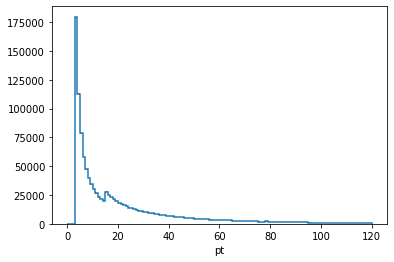

In [15]:
h.plot()

## Di-muon mass plot with awkward

In [16]:
# 2 leading muons with opposite charge
cut = (ak.num(muons.charge) >= 2) & (ak.sum(muons.charge[:, :2], axis=1) == 0)

**WARNING** : 
* I picked this up from Jim's tutorial. This might not be what we would do in the real world. What if you want to plot the mass of the di-muon with mass closest to the Z mass ? 
* This requires some thinking, especially since we're so much used to writing loops
* I don't know if everything is possible with arrays, but we can vectorize loops as well with numba ! 

In [17]:
import pprint
mu1 = muons[cut, 0]
mu2 = muons[cut, 1]
print(muons[cut][0].pt)
print(mu1[0])
print(mu2[0])

[5.72, 5.71, 4.01]
{pt: 5.72, eta: -0.342, phi: 1.08, charge: 1}
{pt: 5.71, eta: -1.27, phi: -1.45, charge: -1}


In [18]:
import numpy as np 
mass = np.sqrt(2*mu1.pt*mu2.pt*(np.cosh(mu1.eta - mu2.eta) - np.cos(mu1.phi - mu2.phi)))

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x2abb8f0c7a00>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

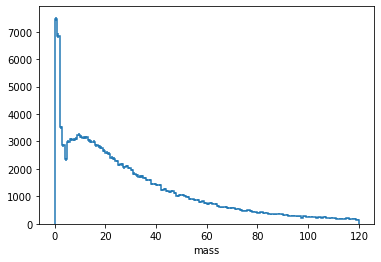

In [19]:
h = hist.Hist.new.Reg(120, 0, 120, name="mass").Double()
h.fill(mass)
h.plot()

## Recreating physics "objects"

Just the same as above, but more user friendly

In [20]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

In [21]:
import numpy as np
np.__version__

'1.21.5'

In [22]:
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()

In [23]:
events.fields

['MET',
 'event',
 'LHEPdfWeight',
 'LHEReweightingWeight',
 'btagWeight',
 'GenIsolatedPhoton',
 'HLTriggerFinalPath',
 'IsoTrack',
 'Pileup',
 'Photon',
 'RawPuppiMET',
 'SubJet',
 'SubGenJetAK8',
 'LHEWeight',
 'Jet',
 'LHEScaleWeight',
 'OtherPV',
 'DeepMETResolutionTune',
 'ChsMET',
 'L1simulation',
 'PuppiMET',
 'TkMET',
 'PV',
 'luminosityBlock',
 'DeepMETResponseTune',
 'SoftActivityJetNjets10',
 'Tau',
 'SoftActivityJetHT',
 'run',
 'fixedGridRhoFastjetCentralCalo',
 'SV',
 'TrigObj',
 'GenVisTau',
 'GenVtx',
 'fixedGridRhoFastjetCentral',
 'GenMET',
 'Electron',
 'SoftActivityJetHT2',
 'fixedGridRhoFastjetAll',
 'SoftActivityJet',
 'CaloMET',
 'FsrPhoton',
 'LHE',
 'SoftActivityJetNjets5',
 'L1',
 'SoftActivityJetHT10',
 'L1PreFiringWeight',
 'SoftActivityJetNjets2',
 'GenDressedLepton',
 'CorrT1METJet',
 'genTtbarId',
 'PSWeight',
 'HLT',
 'GenJet',
 'fixedGridRhoFastjetCentralChargedPileUp',
 'boostedTau',
 'HLTriggerFirstPath',
 'Muon',
 'LHEPart',
 'LowPtElectron',
 'GenJ

In [24]:
# only muons, event by event:
muons = events.Muon
# print first 10 events
print(muons[:10])

[[Muon, Muon], [], [Muon, Muon, Muon], [], ... [Muon, Muon], [Muon], [], [], []]


In [25]:
muons[0][0].fields

['dxy',
 'dxyErr',
 'dxybs',
 'dz',
 'dzErr',
 'eta',
 'ip3d',
 'jetPtRelv2',
 'jetRelIso',
 'mass',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'pfRelIso03_all',
 'pfRelIso03_chg',
 'pfRelIso04_all',
 'phi',
 'pt',
 'ptErr',
 'segmentComp',
 'sip3d',
 'softMva',
 'tkRelIso',
 'tunepRelPt',
 'mvaLowPt',
 'mvaTTH',
 'charge',
 'jetIdx',
 'nStations',
 'nTrackerLayers',
 'pdgId',
 'tightCharge',
 'fsrPhotonIdx',
 'highPtId',
 'highPurity',
 'inTimeMuon',
 'isGlobal',
 'isPFcand',
 'isStandalone',
 'isTracker',
 'jetNDauCharged',
 'looseId',
 'mediumId',
 'mediumPromptId',
 'miniIsoId',
 'multiIsoId',
 'mvaId',
 'mvaLowPtId',
 'pfIsoId',
 'puppiIsoId',
 'softId',
 'softMvaId',
 'tightId',
 'tkIsoId',
 'triggerIdLoose',
 'genPartIdx',
 'genPartFlav',
 'cleanmask',
 'fsrPhotonIdxG',
 'genPartIdxG',
 'jetIdxG']

In [26]:
muons[0][0].pt

113.9150619506836

Note that energy is not present in the list above. It's not stored natively in the nano AOD. But Coffea gives us Lorentz operations :

In [27]:
muons[0][0].energy

129.8726839539548

And we can compute the energy for all muons in one go, preserving the event structure. This operation is vectorized and fast:

In [28]:
muons.energy

<Array [[130, 7.42], [], ... [207], []] type='1122000 * var * float32'>

Select two muon events: 

In [29]:
di_muons = muons[
    (ak.num(events.Muon) == 2)
    & (ak.sum(events.Muon.charge, axis=1) == 0)
]
di_muons

<MuonArray [[Muon, Muon], ... [Muon, Muon]] type='103577 * var * muon'>

In [30]:
zmm = di_muons[:, 0] + di_muons[:, 1]
zmm

<CandidateArray [{x: 4.72, y: -12, ... charge: 0}] type='103577 * Candidate["x":...'>

In [31]:
zmm.mass

<Array [14.2, 6.58, 44.4, ... 16.3, 21, 46.3] type='103577 * float32'>

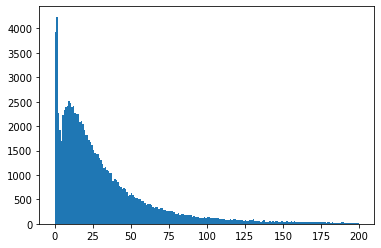

In [32]:
_ = plt.hist(zmm.mass, bins=200, range=(0, 200))

## Set up dask cluster

In [42]:
from dask_jobqueue import SLURMCluster

cluster = SLURMCluster(
    # queue='normal',
    project="cms",
    cores=1,
    memory="8 GB", 
    walltime="02:00:00",
)


In [43]:
cluster.scale(jobs=23) 

In [44]:
cluster.dashboard_link

'http://134.158.83.2:8787/status'

In [45]:
from distributed import Client

client = Client(cluster) 

In [41]:
cluster.close()

## Coffea Processor

In [46]:
from hist import Hist
from coffea import processor

class MyZPeak(processor.ProcessorABC):
    def __init__(self):
        pass
    
    # we will receive a NanoEvents instead of a coffea DataFrame
    def process(self, events):
        out = (
            Hist.new
            .Reg(200, 0, 200, name="mass", label="Z mass")
            .Int64()
        )

        mmevents = events[
            (ak.num(events.Muon) == 2)
            & (ak.sum(events.Muon.charge, axis=1) == 0)
        ]

        zmm = mmevents.Muon[:, 0] + mmevents.Muon[:, 1]
    
        out.fill(
            mass=zmm.mass,
        )
        return { events.metadata["dataset"]: out }
    
    def postprocess(self, accumulator):
        return accumulator


**Note** : 
* not completely sure about the level of vectorization in this case (in the Lorentz operators)
* will use multiprocessing on 23 workers on a single machine
* could use dask on the slurm cluster for 500 workers just as well

In [47]:
samples = {
    "DrellYan": input_files  # 23 files
}

In [55]:
out = processor.run_uproot_job(
    samples,
    treename="Events",
    processor_instance=MyZPeak(),
    # this executor is for multiprocessing. 
    # there is also a dask executor to run on the slurm cluster (from the same notebook)
    # executor=processor.futures_executor, 
    # executor_args={"schema": NanoAODSchema, "workers": 5},
    executor=processor.dask_executor,
    executor_args={"schema": NanoAODSchema, 
                   "client": client},
    chunksize=int(1e7),   # is important, don't make it too small, and don't blow up your memory 
    maxchunks=None,
    # schema=processor.NanoAODSchema,
)


I don't know what are the errors above. probably no big deal but how to debug ? 

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x2abc71d64d00>, errorbar=None, legend_artist=None)]

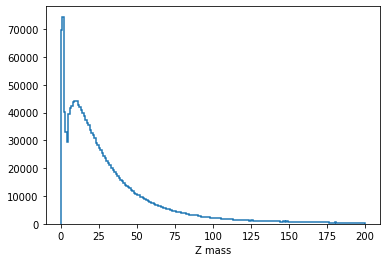

In [56]:
out["DrellYan"].plot()

Can also work with vectorized loops (untested)
https://coffeateam.github.io/coffea/notebooks/processor.html#Getting-fancy 


## Conclusion 

* lots of potential, not even using GPUs or a large cluster yet
* CMS people could team up to write vectorized functions for NanoAOD and contribute them to coffea
* Usable by any experiment using ROOT. Might need to contribute schemas to coffea
* both coffea and uproot/awkward are professionnally maintained, e.g. https://coffeateam.github.io/coffea/index.html, by CERN and CMS people (Jim Pivarski, Nicholas Smith, Oksana Shadura, Lindsey Gray, ...)

